In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [4]:
data = pd.read_csv('/Users/atharhussain/Developer/Projects/ML/NASA/data/nearest-earth-objects(1910-2024).csv')

In [5]:
print("Shape of dataset:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nSample rows:\n", data.head())

Shape of dataset: (338199, 9)

Columns: ['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'orbiting_body', 'relative_velocity', 'miss_distance', 'is_hazardous']

Sample rows:
     neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3   

In [6]:
print("\nDataset Info:")
print(data.info())
print("\nMissing values:\n", data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB
None

Missing values:
 neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_vel

In [7]:
# Handle missing values with imputation
missing_cols = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max"]

print("\nMissing values before imputation:")
print(data[missing_cols].isnull().sum())

# Use median imputation
for col in missing_cols:
    median_val = data[col].median()
    data[col].fillna(median_val, inplace=True)
    print(f"Filled missing {col} with median value {median_val:.3f}")

print("\nMissing values after imputation:")
print(data[missing_cols].isnull().sum())



Missing values before imputation:
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
dtype: int64
Filled missing absolute_magnitude with median value 22.800
Filled missing estimated_diameter_min with median value 0.073
Filled missing estimated_diameter_max with median value 0.164

Missing values after imputation:
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
dtype: int64


In [8]:
if "close_approach_date" in data.columns:
    data["year"] = pd.to_datetime(data["close_approach_date"], errors="coerce").dt.year
    yearly = data.groupby(["year", "is_hazardous"]).size().reset_index(name="count")
    
    plt.figure(figsize=(12,6))
    sns.lineplot(data=yearly, x="year", y="count", hue="is_hazardous", marker="o")
    plt.title("Hazardous vs Non-Hazardous Asteroids Over Time")
    plt.show()


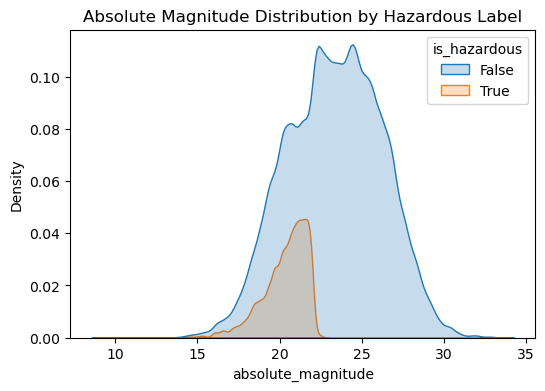

In [9]:
plt.figure(figsize=(6,4))
sns.kdeplot(x="absolute_magnitude", hue="is_hazardous", data=data, fill=True)
plt.title("Absolute Magnitude Distribution by Hazardous Label")
plt.show()


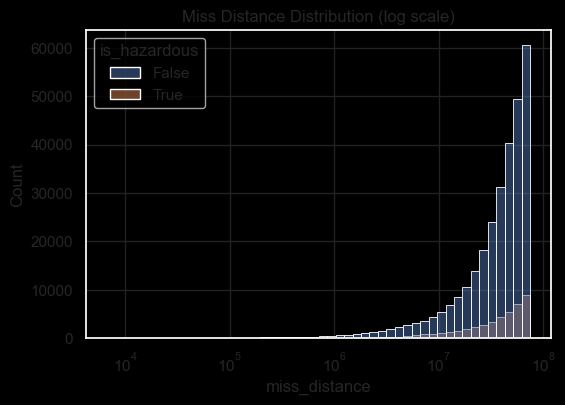

In [38]:
plt.figure(figsize=(6,4))
sns.histplot(data, x="miss_distance", hue="is_hazardous", bins=50, log_scale=True)
plt.title("Miss Distance Distribution (log scale)")
plt.show()


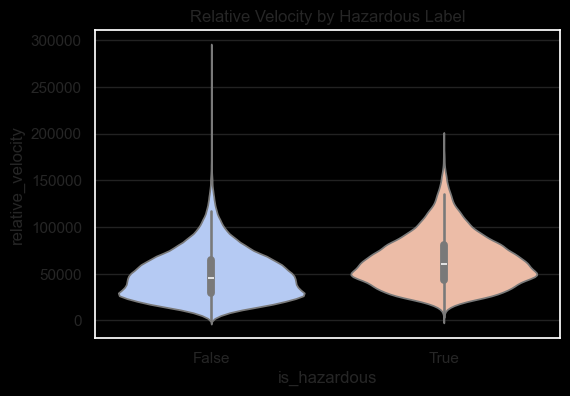

In [34]:
plt.figure(figsize=(6,4))
sns.violinplot(x="is_hazardous", y="relative_velocity", data=data, palette="coolwarm")
plt.title("Relative Velocity by Hazardous Label")
plt.show()


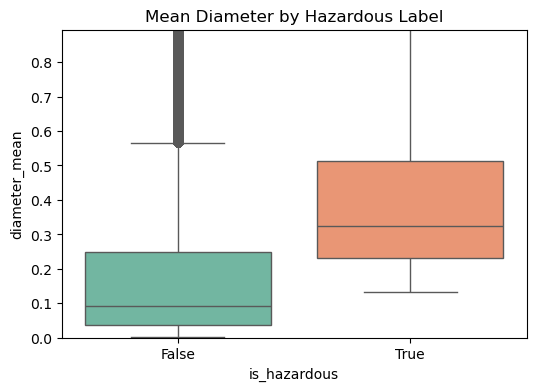

In [12]:
data["diameter_mean"] = (data["estimated_diameter_min"] + data["estimated_diameter_max"]) / 2

plt.figure(figsize=(6,4))
sns.boxplot(x="is_hazardous", y="diameter_mean", data=data, palette="Set2")
plt.ylim(0, np.percentile(data["diameter_mean"], 95)) 
plt.title("Mean Diameter by Hazardous Label")
plt.show()


In [13]:
data['is_hazardous'].value_counts(normalize=True) * 100

is_hazardous
False    87.237691
True     12.762309
Name: proportion, dtype: float64

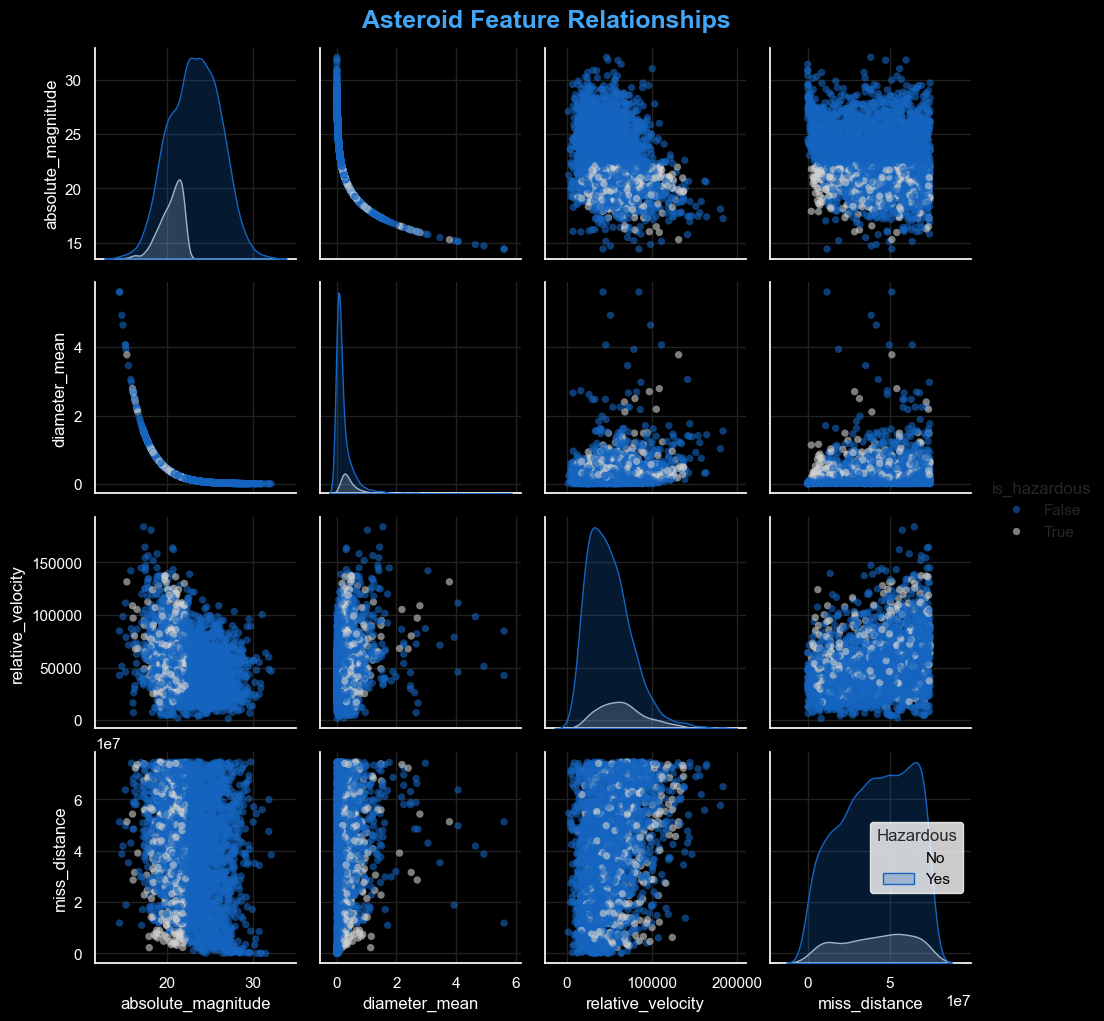

In [29]:
sample_df = data.sample(3000, random_state=42)

# Black theme
sns.set_theme(style="darkgrid", rc={
    "axes.facecolor": "black",   # pure black background
    "figure.facecolor": "black",
    "grid.color": "#222222"      # subtle dark gray grid
})

# Blue gradient palette
palette = {0: "#1565C0", 1: "#CFD0D0"}  # light blue vs deep blue

# Pairplot
g = sns.pairplot(
    sample_df, 
    vars=["absolute_magnitude", "diameter_mean", "relative_velocity", "miss_distance"], 
    hue="is_hazardous", 
    diag_kind="kde", 
    palette=palette,
    plot_kws={'alpha':0.6, 's':28, 'edgecolor':"none"}  # scatter glow effect
)

# Apply black background + white labels
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_facecolor("black")
        ax.tick_params(colors="white")
        ax.xaxis.label.set_color("white")
        ax.yaxis.label.set_color("white")

# Legend styling
plt.legend(
    title="Hazardous", 
    labels=["No", "Yes"], 
    facecolor="white", 
    edgecolor="white", 
    labelcolor="black"
)

# Title
plt.suptitle("Asteroid Feature Relationships", 
             fontsize=18, fontweight="bold", 
             color="#42A5F5", y=1.02)

plt.show()

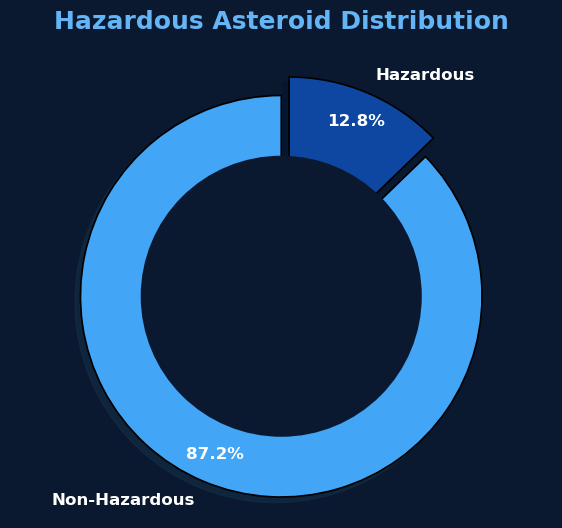

In [21]:
import matplotlib.pyplot as plt

# Data
counts = data["is_hazardous"].value_counts()
labels = ["Non-Hazardous", "Hazardous"]

# Blue gradient colors
colors = ["#42A5F5", "#0D47A1"]  

# Explode Hazardous slice slightly
explode = [0, 0.1]

# Create figure with dark background
fig, ax = plt.subplots(figsize=(7,6), facecolor="#0A192F")

# Plot pie with shadow
wedges, texts, autotexts = ax.pie(
    counts, 
    autopct="%.1f%%", 
    explode=explode, 
    labels=labels, 
    colors=colors,
    startangle=90, 
    pctdistance=0.85,
    textprops={'color':"white", 'fontsize':12, 'weight':'bold'},
    shadow=True  # <-- adds shadow
)

# Donut effect
centre_circle = plt.Circle((0,0),0.70,fc="#0A192F")
fig.gca().add_artist(centre_circle)

# Enhance shadow-like glow around wedges
for w in wedges:
    w.set_edgecolor("black")
    w.set_linewidth(1.2)

# Title
plt.title("Hazardous Asteroid Distribution", fontsize=18, weight="bold", color="#64B5F6", pad=20)

# Equal aspect ratio
ax.axis("equal")

plt.show()


In [17]:
# Feature Engineering
data["diameter_mean"] = (data["estimated_diameter_min"] + data["estimated_diameter_max"]) / 2
data["velocity_diameter_ratio"] = data["relative_velocity"] / (data["diameter_mean"] + 1e-6)
data["log_miss_distance"] = np.log1p(data["miss_distance"])
data["threat_score"] = data["diameter_mean"] / (data["miss_distance"] + 1e-6)

print(data[["diameter_mean","velocity_diameter_ratio","log_miss_distance","threat_score"]].head())


   diameter_mean  velocity_diameter_ratio  log_miss_distance  threat_score
0       0.639061            112266.651941          17.878427  1.099108e-08
1       0.858109            128130.095985          17.837303  1.537801e-08
2       0.220568            112733.432196          18.023286  3.281926e-09
3       0.321768            245176.257985          17.229836  1.058571e-08
4       0.124035            451777.954209          17.960526  1.965102e-09


In [ ]:
clean_path = "/Users/atharhussain/Developer/Projects/ML/NASA/data/clean_data.csv"
data.to_csv(clean_path, index=False)